In [89]:
# import library
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import olivetti_faces

np.random.seed(0)

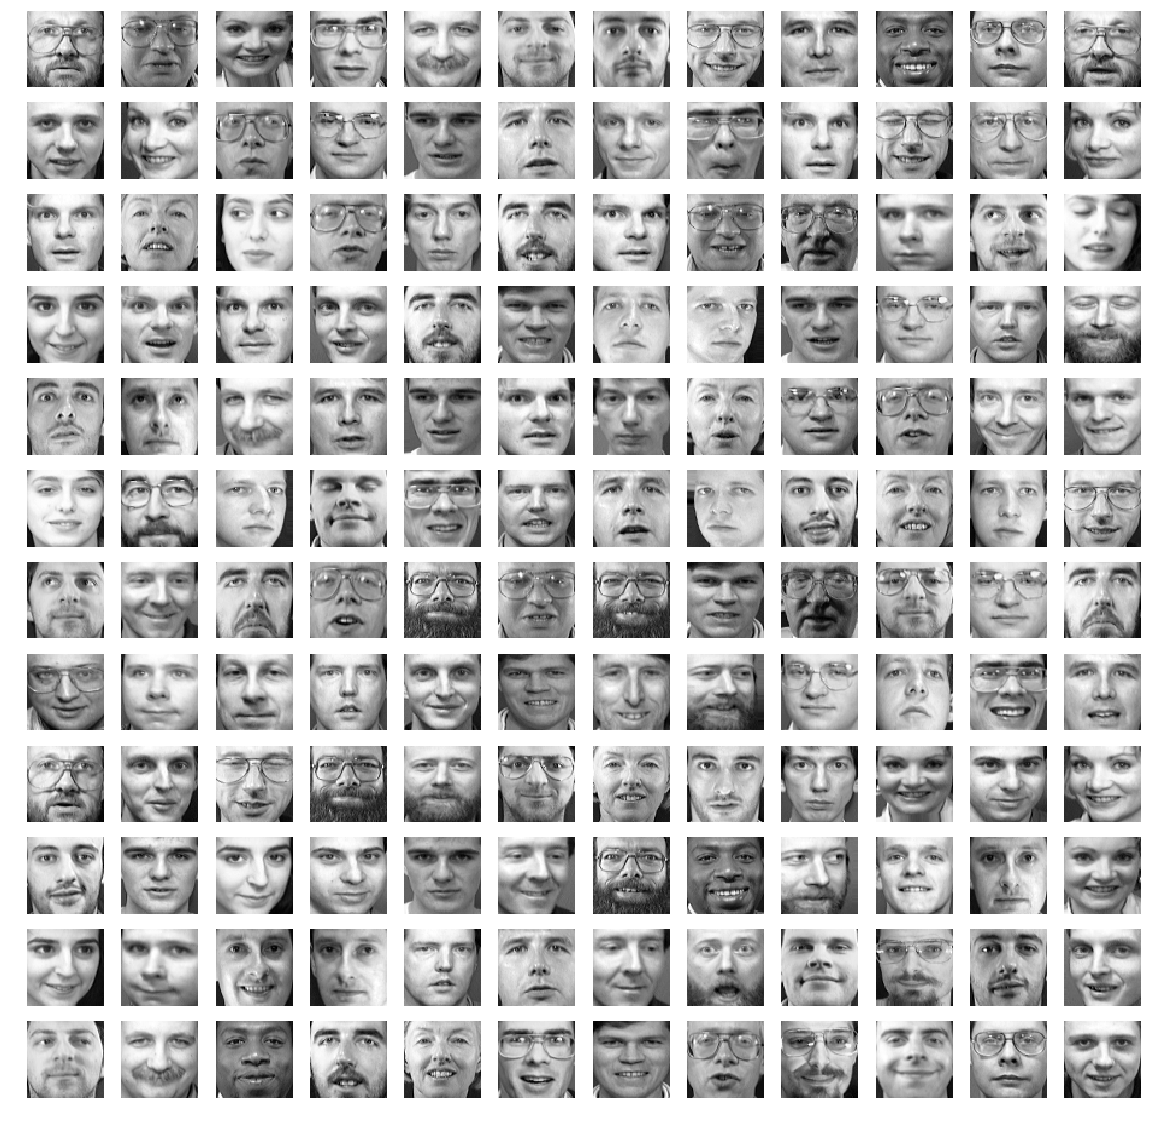

In [90]:
# import data shuffle and view some of the data
face_data = olivetti_faces.fetch_olivetti_faces().data
idx = np.random.permutation(len(face_data))
face_data = face_data[idx]

fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

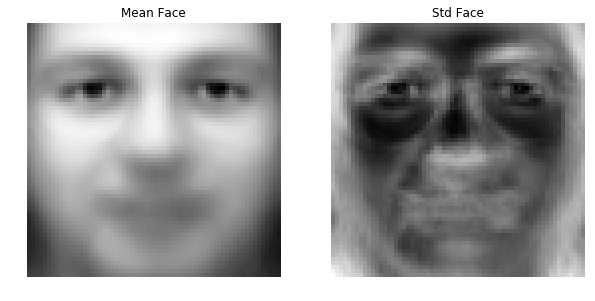

In [91]:
# see the mean face per dimension as well as std face
mean_face = face_data.mean(0); std_face = face_data.std(0)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(mean_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Mean Face")

plt.subplot(122)
plt.imshow(std_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Std Face")

plt.show()

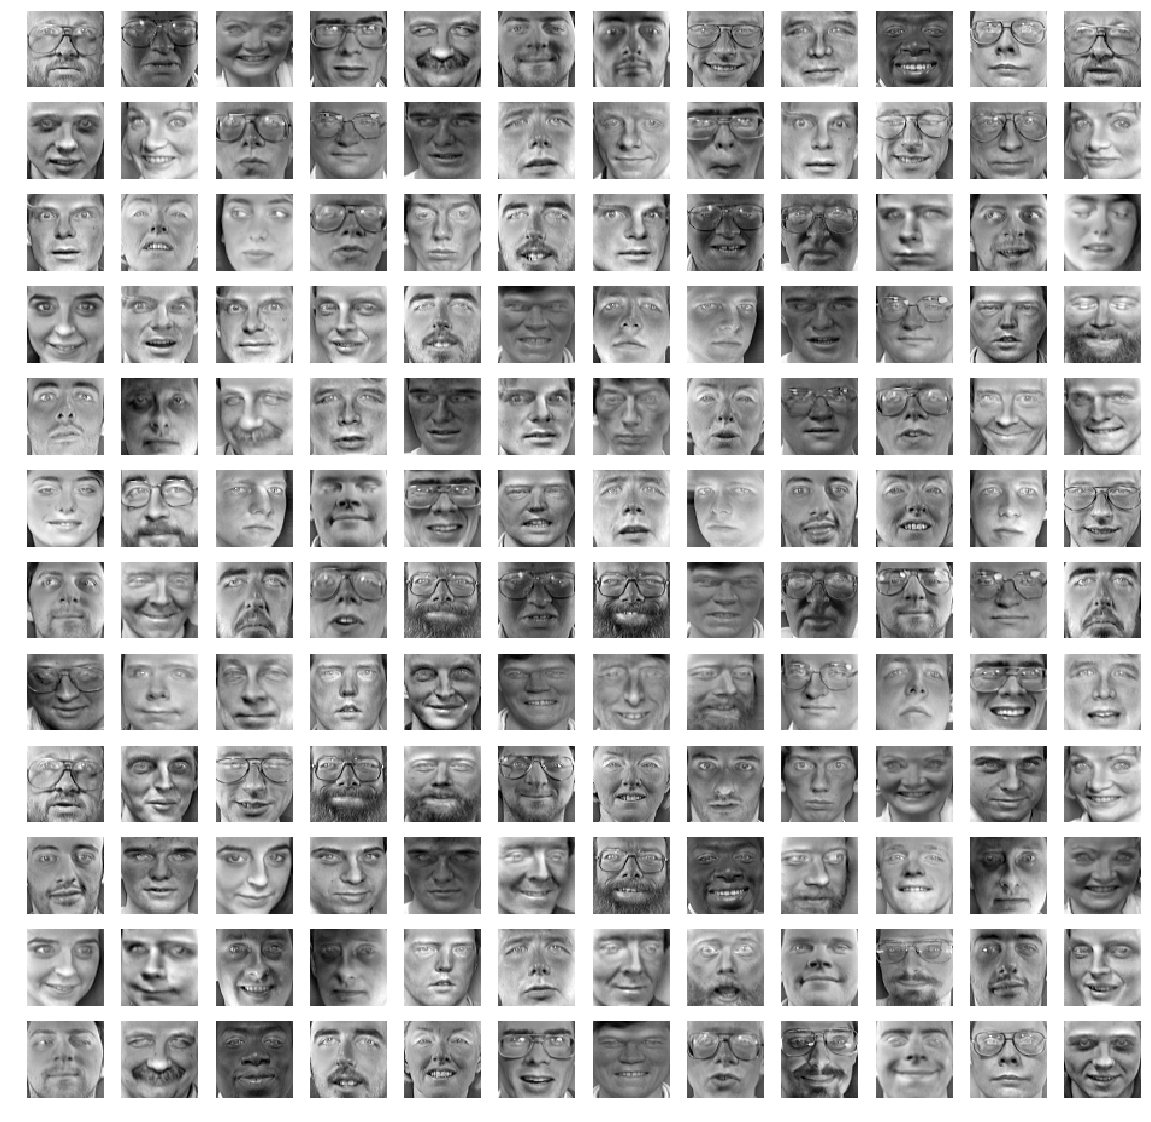

In [92]:
# View the mean subtracted images
normalized_face_data = face_data - mean_face
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(normalized_face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [93]:
# Computer the scatter matrix
face_cov = np.cov(normalized_face_data,rowvar=False)
face_scatter = normalized_face_data.T.dot(normalized_face_data)
print('Shape of co-variance matrix: ',face_cov.shape)
print('Shape of scatter Matrix: ',face_scatter.shape)
print('Ratio Difference between co-variance matrix and scatter' ,(face_scatter/face_cov).mean() )
print('The ratio above should be 399 since we have 400 examples.')
# note: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Shape of co-variance matrix:  (4096, 4096)
Shape of scatter Matrix:  (4096, 4096)
Ratio Difference between co-variance matrix and scatter 399.0000188588569
The ratio above should be 399 since we have 400 examples.


In [94]:
# compute the eigen vector and value
eig_val_cov, eig_vec_cov = LA.eigh(face_cov)
check_left_side = face_cov.dot(eig_vec_cov)
check_right_side = eig_vec_cov.dot(np.diag(eig_val_cov))
np.testing.assert_array_almost_equal(check_left_side.all(),check_right_side.all(),decimal=6, err_msg='', verbose=True)
print('Mean of the left  side of equation: ',check_left_side.mean())
print('Mean of the right side of equation: ',check_right_side.mean())
print('Shape of Eig Value: ',eig_val_cov.shape)
print('Shape of Eig Vector: ',eig_vec_cov.shape)

Mean of the left  side of equation:  -7.275638766934623e-05
Mean of the right side of equation:  -7.275638766934607e-05
Shape of Eig Value:  (4096,)
Shape of Eig Vector:  (4096, 4096)


In [95]:
# check if co-variance matrix is achieved
made_face_cov = eig_vec_cov.dot(np.diag(eig_val_cov)).dot(eig_vec_cov.T)
print('Recon Cov: ',made_face_cov.mean(),made_face_cov.sum())
print('Original Cov: ',face_cov.mean(),face_cov.sum())

Recon Cov:  0.004127744308769345 69252.057860994
Original Cov:  0.004127744308769346 69252.05786099401


In [96]:
# sort the eigen values 
print('First 5 Values before sorting: ',eig_val_cov[:5])
print('Final 5 Values before sorting: ',eig_val_cov[-5:])
print('First 5 Vector Mean before sorting: ',eig_vec_cov[:,:5].mean())
print('Final 5 Vector Mean before sorting: ',eig_vec_cov[:,-5:].mean())
idx = np.argsort(eig_val_cov)[::-1]
print('-------------------------')
eig_vec_cov_sort = eig_vec_cov[:,idx]; eig_val_cov_sort = eig_val_cov[idx]
print('First 5 Values after sorting: ',eig_val_cov_sort[:5])
print('Final 5 Values after sorting: ',eig_val_cov_sort[-5:])
print('First 5 Vector Mean after sorting: ',eig_vec_cov_sort[:,:5].mean())
print('Final 5 Vector Mean after sorting: ',eig_vec_cov_sort[:,-5:].mean())

First 5 Values before sorting:  [-1.34151207e-14 -8.04061263e-15 -6.00617227e-15 -3.80474144e-15
 -1.65023042e-15]
Final 5 Values before sorting:  [ 2.85604263  3.9545841   6.30461473 11.0717621  18.84017582]
First 5 Vector Mean before sorting:  5.237490950781015e-06
Final 5 Vector Mean before sorting:  -0.003540521263005781
-------------------------
First 5 Values after sorting:  [18.84017582 11.0717621   6.30461473  3.9545841   2.85604263]
Final 5 Values after sorting:  [-1.65023042e-15 -3.80474144e-15 -6.00617227e-15 -8.04061263e-15
 -1.34151207e-14]
First 5 Vector Mean after sorting:  -0.003540521263005781
Final 5 Vector Mean after sorting:  5.237490950781015e-06


In [97]:
# select k eigen vectors
eig_vec_cov_small = eig_vec_cov_sort[:1024,:]
print('Original Eig Vector: ',eig_vec_cov_sort.shape)
print('Selected Eig Vector: ',eig_vec_cov_small.shape)

Original Eig Vector:  (4096, 4096)
Selected Eig Vector:  (1024, 4096)


Reduced data Shape : (400, 1024)


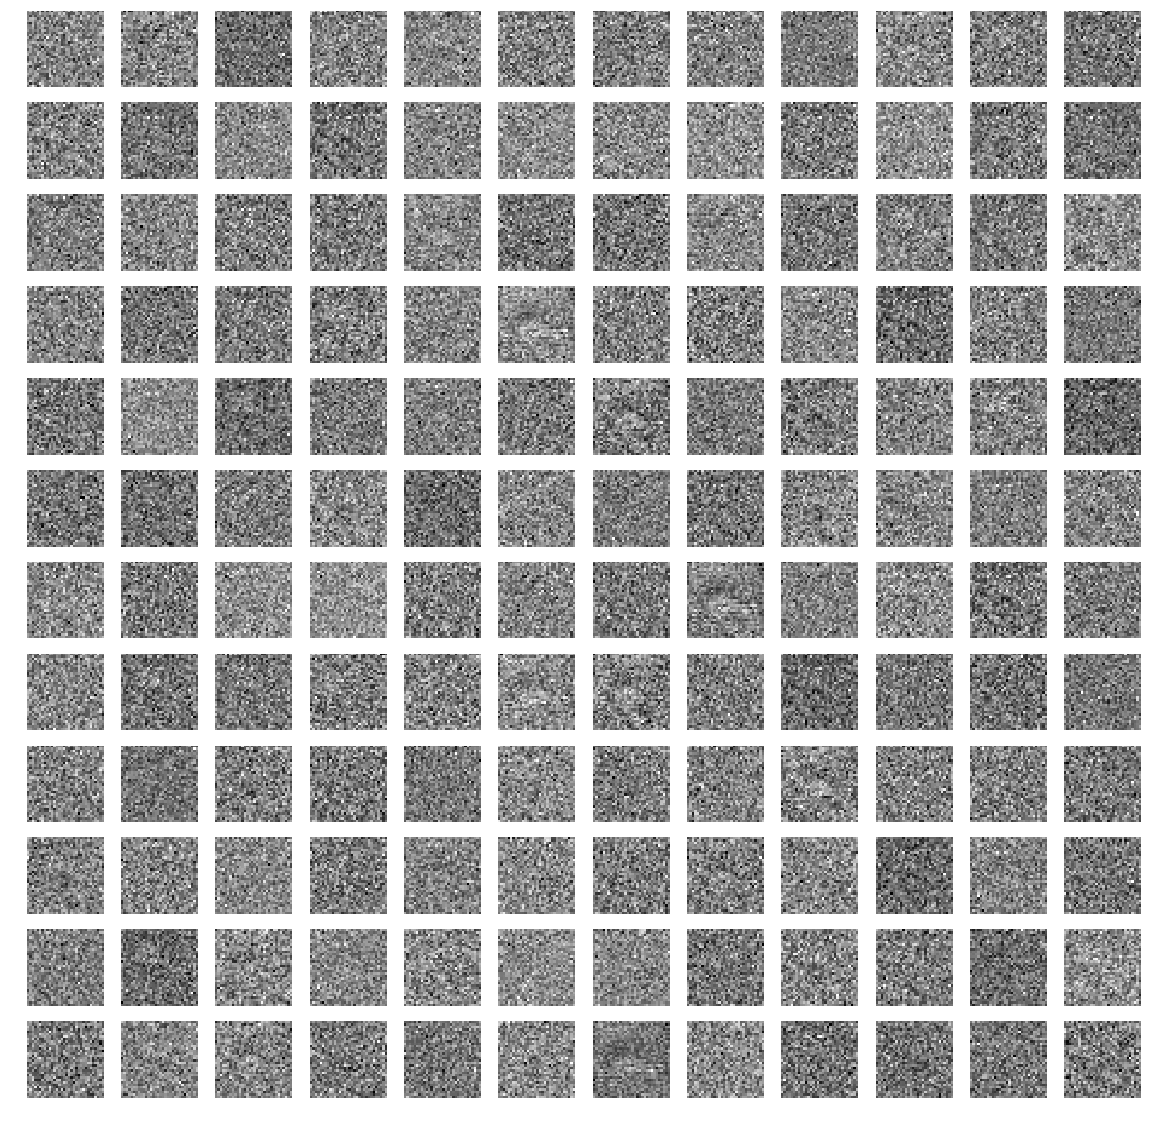

In [98]:
# Transform the original data
normalized_small = normalized_face_data.dot(eig_vec_cov_small.T)
print('Reduced data Shape :',normalized_small.shape)
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(normalized_small[i-1].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()

In [143]:
%reset_selective normalized_face_data
normalized_face_data = face_data - mean_face
# Computer the scatter matrix (respect to examples)
face_cov = np.cov(normalized_face_data,rowvar=True)
face_scatter = normalized_face_data.dot(normalized_face_data.T)
print('Shape of co-variance matrix: ',face_cov.shape)
print('Shape of scatter Matrix: ',face_scatter.shape)
print('Ratio Difference between co-variance matrix and scatter' ,(face_scatter/face_cov).mean() )
print('The ratio above should be around 4095 however 3035.5199102949605')
# note: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Once deleted, variables cannot be recovered. Proceed (y/[n])?  
Nothing done.
Shape of co-variance matrix:  (400, 400)
Shape of scatter Matrix:  (400, 400)
Ratio Difference between co-variance matrix and scatter 3035.5199102949605
The ratio above should be around 4095 however 3035.5199102949605


In [144]:
# check the ratio difference
eig_val_sc, eig_vec_sc = LA.eigh(face_scatter)
eig_val_cov, eig_vec_cov = LA.eigh(face_cov)
print('Are Eig Vectors same? : ',eig_vec_sc.all() == eig_vec_cov.all())
print('Ratio Difference? : ',eig_val_sc[1]/eig_val_cov[1] )

for i in range(10):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,400).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,400).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector mean {}: {}'.format(i+1, eigvec_sc.mean()))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')
    # The ratio is not perfectly there hence there we be differences      

Are Eig Vectors same? :  True
Ratio Difference? :  4098.879694989357
Eigenvector mean 1: -0.05000000819563866
Eigenvalue 1 from scatter matrix: 1.845201950345654e-05
Eigenvalue 1 from covariance matrix: 9.519486858204043e-12
Scaling factor:  1938341.8222332331
----------------------------------------
Eigenvector mean 2: -7.718801384726248e-07
Eigenvalue 2 from scatter matrix: 0.5176287889480591
Eigenvalue 2 from covariance matrix: 0.00012628543101199832
Scaling factor:  4098.879694989357
----------------------------------------
Eigenvector mean 3: -4.041195040827006e-07
Eigenvalue 3 from scatter matrix: 0.6321190595626831
Eigenvalue 3 from covariance matrix: 0.00015433177117997636
Scaling factor:  4095.8452995755993
----------------------------------------
Eigenvector mean 4: -3.648549409263069e-07
Eigenvalue 4 from scatter matrix: 0.6760170459747314
Eigenvalue 4 from covariance matrix: 0.00016483333668506492
Scaling factor:  4101.215564581746
----------------------------------------
E

From the results shown below we can observe that using a co variance matrix is a better idea


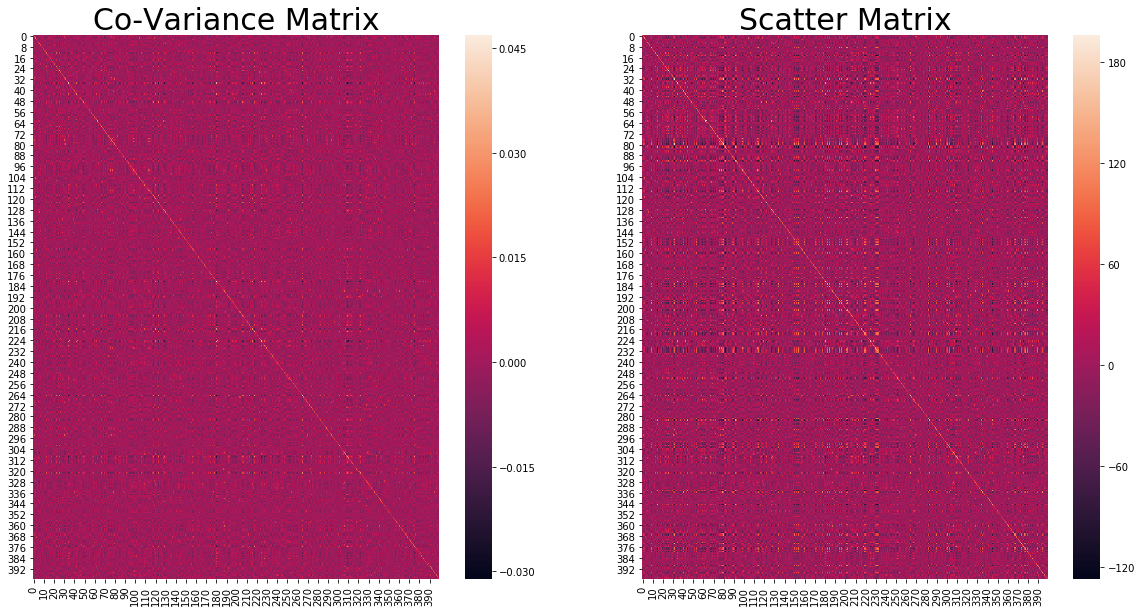

In [145]:
# view the heat map
print('From the results shown below we can observe that using a co variance matrix is a better idea')
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.heatmap(face_cov)
plt.title("Co-Variance Matrix",fontsize=30)
plt.subplot(122)
sns.heatmap(face_scatter)
plt.title("Scatter Matrix",fontsize=30)
plt.show()

Sum of Differneces between my co-variance and numpy:  -8.911154285780918e-09
Shape of co-variance matrix:  (400, 400)
Shape of scatter Matrix:  (400, 400)
Ratio Difference between co-variance matrix and scatter 4095.000088491706
Now after subtracting the mean we can observe the correct ratio differnece.


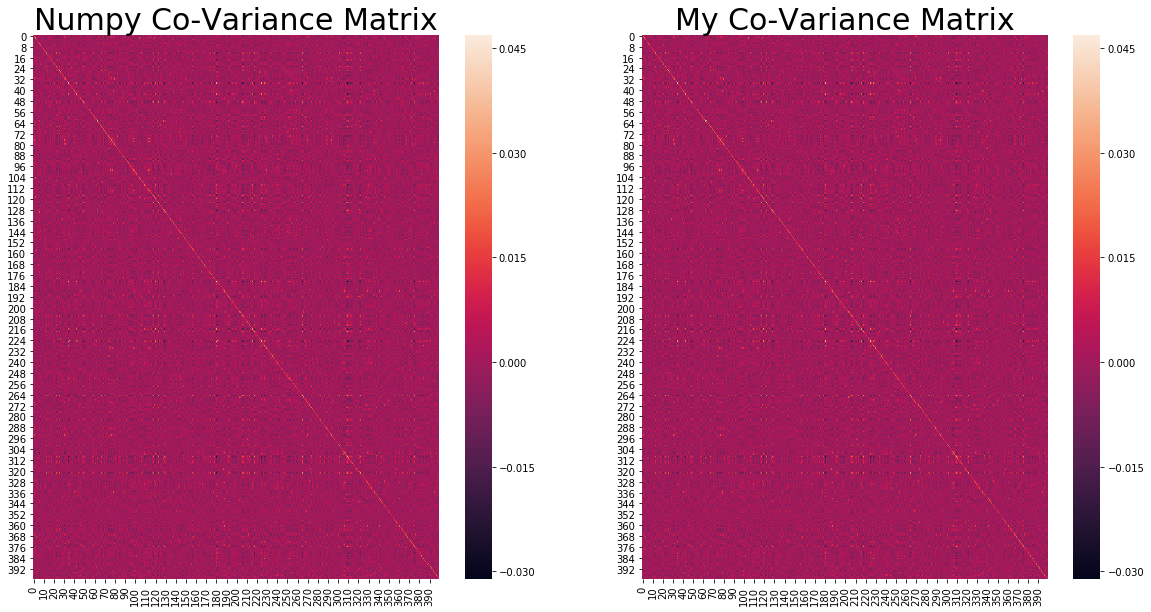

In [167]:
# compute the co-variance matrix manually
my_data = normalized_face_data.copy()
my_data = my_data - my_data.mean(1)[:,np.newaxis] # subtract the mean per example as well
my_cov  = my_data.dot(my_data.T) / (my_data.shape[1]-1)

calculate_difference = face_cov-my_cov
print('Sum of Differneces between my co-variance and numpy: ', calculate_difference.sum())
correct_ratio_difference  = my_data.dot(my_data.T)
print('Shape of co-variance matrix: ',face_cov.shape)
print('Shape of scatter Matrix: ',correct_ratio_difference.shape)
print('Ratio Difference between co-variance matrix and scatter' ,(correct_ratio_difference/face_cov).mean() )
print('Now after subtracting the mean we can observe the correct ratio differnece.')

plt.figure(figsize=(20,10))
plt.subplot(121)
sns.heatmap(face_cov)
plt.title("Numpy Co-Variance Matrix",fontsize=30)
plt.subplot(122)
sns.heatmap(my_cov)
plt.title("My Co-Variance Matrix",fontsize=30)
plt.show()

In [121]:
# compute the eigen vector and value
eig_val_cov, eig_vec_cov = LA.eigh(face_cov)
check_left_side = face_cov.dot(eig_vec_cov)
check_right_side = eig_vec_cov.dot(np.diag(eig_val_cov))
np.testing.assert_array_almost_equal(check_left_side.all(),check_right_side.all(),decimal=6, err_msg='', verbose=True)
print('Mean of the left  side of equation: ',check_left_side.mean())
print('Mean of the right side of equation: ',check_right_side.mean())
print('Shape of Eig Value: ',eig_val_cov.shape)
print('Shape of Eig Vector: ',eig_vec_cov.shape)

Mean of the left  side of equation:  4.4259439928740624e-11
Mean of the right side of equation:  4.425943991989353e-11
Shape of Eig Value:  (400,)
Shape of Eig Vector:  (400, 400)


In [122]:
# check if co-variance matrix is achieved
made_face_cov = eig_vec_cov.dot(np.diag(eig_val_cov)).dot(eig_vec_cov.T)
print('Recon Cov: ',made_face_cov.mean(),made_face_cov.sum())
print('Original Cov: ',face_cov.mean(),face_cov.sum())

Recon Cov:  2.7263949062793225e-14 4.362231850046916e-09
Original Cov:  2.7263946178815445e-14 4.362231388610471e-09


In [123]:
# sort the eigen values 
print('First 5 Values before sorting: ',eig_val_cov[:5])
print('Final 5 Values before sorting: ',eig_val_cov[-5:])
print('First 5 Vector Mean before sorting: ',eig_vec_cov[:,:5].mean())
print('Final 5 Vector Mean before sorting: ',eig_vec_cov[:,-5:].mean())
idx = np.argsort(eig_val_cov)[::-1]
print('-------------------------')
eig_vec_cov_sort = eig_vec_cov[:,idx]; eig_val_cov_sort = eig_val_cov[idx]
print('First 5 Values after sorting: ',eig_val_cov_sort[:5])
print('Final 5 Values after sorting: ',eig_val_cov_sort[-5:])
print('First 5 Vector Mean after sorting: ',eig_vec_cov_sort[:,:5].mean())
print('Final 5 Vector Mean after sorting: ',eig_vec_cov_sort[:,-5:].mean())

First 5 Values before sorting:  [9.51948686e-12 1.26285431e-04 1.54331771e-04 1.64833337e-04
 1.67721243e-04]
Final 5 Values before sorting:  [0.2466416  0.33924216 0.43062361 0.61685815 1.10045777]
First 5 Vector Mean before sorting:  0.009999993274609327
Final 5 Vector Mean before sorting:  1.2696446627380454e-10
-------------------------
First 5 Values after sorting:  [1.10045777 0.61685815 0.43062361 0.33924216 0.2466416 ]
Final 5 Values after sorting:  [1.67721243e-04 1.64833337e-04 1.54331771e-04 1.26285431e-04
 9.51948686e-12]
First 5 Vector Mean after sorting:  1.2696446632931567e-10
Final 5 Vector Mean after sorting:  0.009999993274609327


In [174]:
# select k eigen vectors
eig_vec_cov_small = eig_vec_cov_sort[:,:10]
print('Original Eig Vector: ',eig_vec_cov_sort.shape)
print('Selected Eig Vector: ',eig_vec_cov_small.shape)

Original Eig Vector:  (400, 400)
Selected Eig Vector:  (400, 10)


Reduced data Shape : (10, 4096)


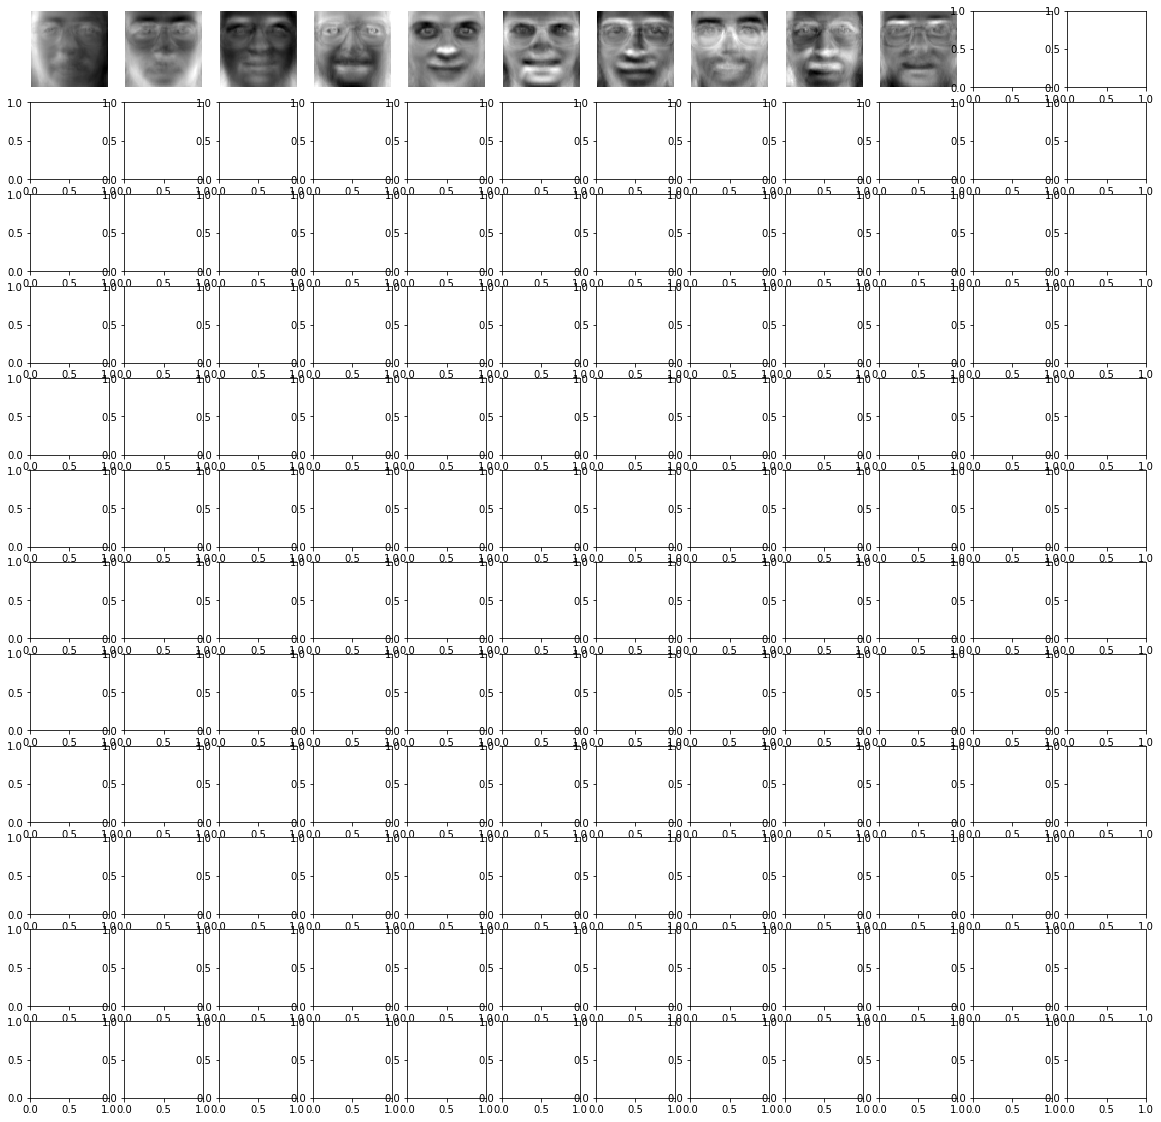

In [175]:
# Transform the original data
normalized_small = eig_vec_cov_small.T.dot(normalized_face_data)
print('Reduced data Shape :',normalized_small.shape)
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    try:
        plt.imshow(normalized_small[i-1].reshape(64,64),cmap='gray')
        plt.axis('off')
    except:
        pass
plt.show()

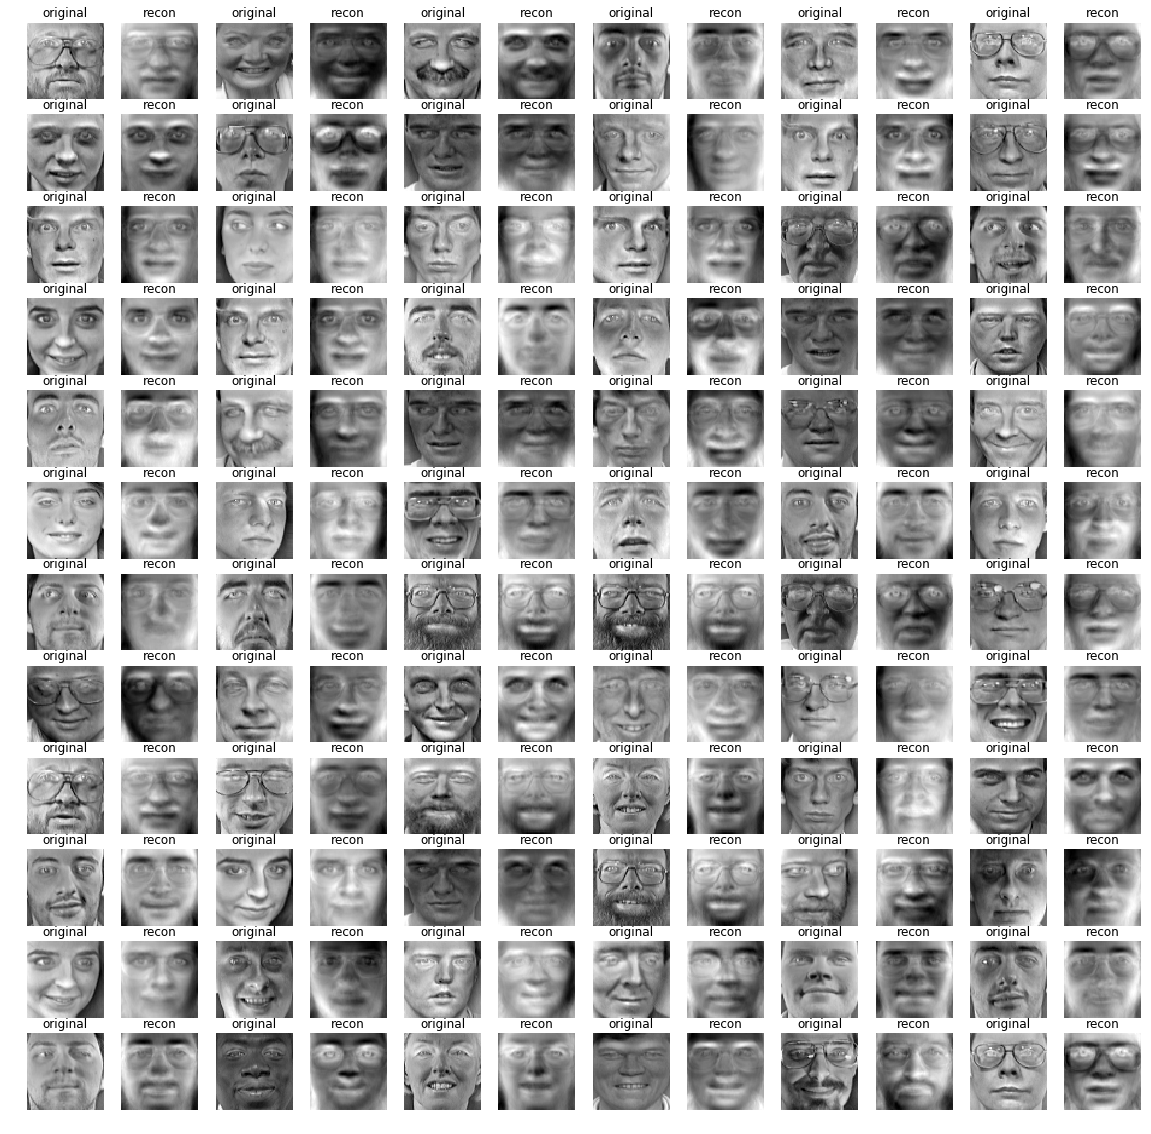

In [176]:
# Get the original face from smaller 
recon = eig_vec_cov_small.dot(normalized_small)
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    if i % 2 == 0 :
        plt.title("recon")
        plt.imshow(recon[i-2].reshape(64,64),cmap='gray')
    else:
        plt.title("original")
        plt.imshow(normalized_face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# now from the original data (no mean subtracted)
original_small = eig_vec_cov_small.T.dot(face_data)
print('Reduced data Shape :',original_small.shape)
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    try:
        plt.imshow(original_small[i-1].reshape(64,64),cmap='gray')
        plt.axis('off')
    except:
        pass
plt.show()

Reduced data Shape : (10, 4096)


In [177]:
! git add .
! git commit -m "from mac"
! git push

[master 57075f85] from mac
 2 files changed, 112 insertions(+), 66 deletions(-)
Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 833.00 KiB | 2.79 MiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   6ada5595..57075f85  master -> master
